In [1]:
import numpy as np

# Question 1
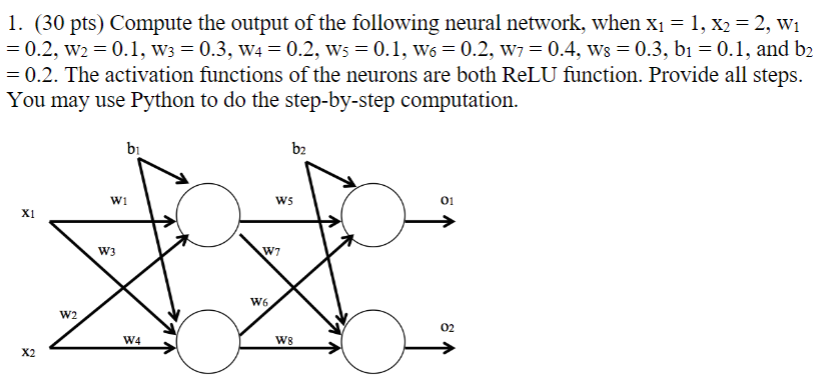

In [2]:
# Declaring the inputs, weights and biases
x1 = 1 
x2 = 2 
w1, w2, w3, w4 = 0.2, 0.1, 0.3, 0.2
w5, w6, w7, w8 = 0.1, 0.2, 0.4, 0.3
b1 = 0.1 
b2 = 0.2

In [3]:
# Define a relu activation for the hidden layer
def relu(x):
    return np.maximum(0, x)

# Compute the hidden layers
hidden1 = relu(x1 * w1 + x2 * w2 + b1)
hidden2 = relu(x1 * w3 + x2 * w4 + b1)

# Compute the output layer
o1 = hidden1 * w5 + hidden2 * w6 + b2
o2 = hidden1 * w7 + hidden2 * w8 + b2

print("Output 1: ", o1)
print("Output 2: ", o2)

Output 1:  0.41000000000000003
Output 2:  0.6399999999999999


# Question 2
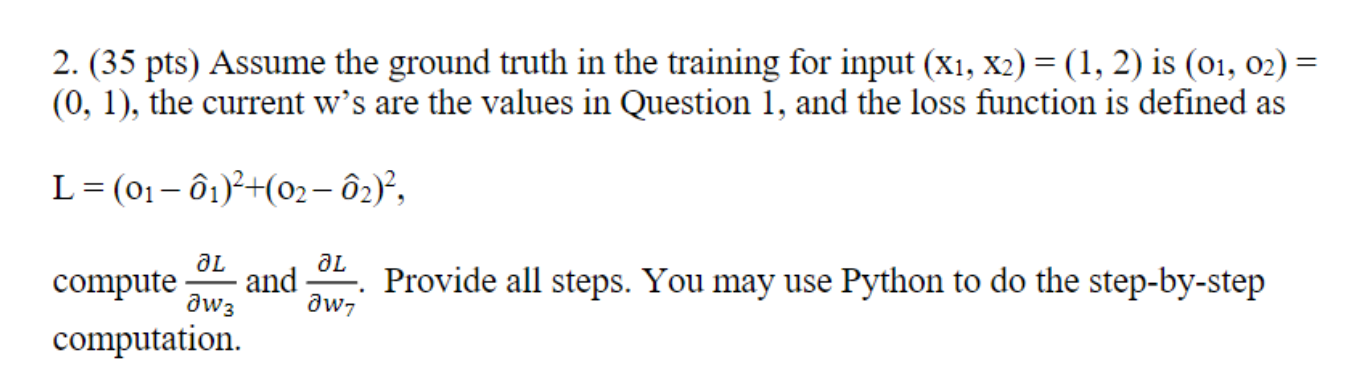

## Deriving the equations for the partial derivatives
Given: <br>
$ h_1 = ReLU(x_1w_1 + x_2w_2 + b_1) $ <br>
$ h_2 = ReLU(x_1w_3 + x_2w_4 + b_1) $ <br>
$ o_1 = h_1w_5 + h_2w_6 + b_2 $ <br>
$ o_2 = h_1w_7 + h_2w_8 + b_2 $ <br>
$ L = (o_1 - \hat{o_1})^2 + (o_2 - \hat{o_2})^2  $ <br><br>

$\frac{\partial L}{\partial \hat{o_1}} = 2(- o_1 + \hat{o_1}) $ and
$\frac{\partial L}{\partial \hat{o_2}} = 2(- o_2 + \hat{o_2}) $ <br>

We need equations that have $\partial w_7$ & $\partial w_3$ in the denominator... <br>

$\frac{\partial \hat{o_2}}{\partial w_7} = \partial \hat{o_2} = h_1\partial w_7 + h_2w_8 + b_2$ <br><br>
$\frac{\partial \hat{o_2}}{\partial w_7} = \partial \hat{o_2} = h_1\partial w_7 + \cancel{h_2w_8} + \cancel{b_2}$ <br><br>
Dividing out the $\partial w_7$ <br><br>
$\frac{\partial \hat{o_2}}{\partial w_7} = \frac{\partial \hat{o_2}}{\partial w_7} = \frac{h_1\partial w_7}{\partial w_7}$ <br><br>

$\frac{\partial \hat{o_2}}{\partial w_7} = \frac{\partial \hat{o_2}}{\partial w_7} = \frac{h_1\cancel{\partial w_7}}{\cancel{\partial w_7}}$ <br><br>

Therefore $\frac{\partial \hat{o_2}}{\partial w_7} = h_1$. <br><br>

$\frac{\partial L}{\partial \hat{o_2}} * \frac{\partial \hat{o_2}}{\partial w_7} = \frac{\partial L}{\partial w_7}$ <br><br> Now we substitue to find our final value <br><br>
$2(-o_2 + \hat{o_2}) * h_1 = \frac{\partial L}{\partial w_7}$



Chain rule for $\frac{\partial L}{\partial w_3}$ <br><br>

$\frac{\partial L}{\partial w_3} = \frac{\partial L}{\partial h_2} * \frac{\partial h_2}{\partial w_3}$ <br><br>

$\frac{\partial L}{\partial h_2} = \frac{\partial L}{\partial \hat{o_1}} * \frac{\partial \hat{o_1}}{\partial h_2} + \frac{\partial L}{\partial \hat{o_2}} * \frac{\partial \hat{o_2}}{\partial h_2}$ <br><br>

$\frac{\partial L}{\partial h_2} = 2(- o_1 + \hat{o_1}) * w_6 + 2(- o_2 + \hat{o_2}) * w_8$ <br><br>

$\frac{\partial h_2}{\partial w_3} = ReLU\rq(z)$ where $z = x_1w_3 + x_2w_4 + b_1$ <br><br>
$\frac{\partial z}{\partial w_3} = x_1$ therefore $\frac{\partial h_2}{\partial w_3} = x_1 * ReLU\rq(z)$ <br><br>

Now we have all three terms for the chain rule:
$\frac{\partial L}{\partial w_3} = [2(- o_1 + \hat{o_1}) * w_6 + 2(- o_2 + \hat{o_2}) * w_8] * [x_1 * ReLU\rq(z)]$ 


In [4]:
dl_over_dw7 = 2 * (-1 + o2) * hidden1

def derivative_relu(x):
    return 1 if x > 0 else 0

dl_over_dw3 = (2 * (-0 + o1) * w5 + 2 * (-1 + o2) * w8) * derivative_relu(x1 * w3 + x2 * w4 + b1) * x1

print("Derivative of loss with respect to w7: ", dl_over_dw7)
print("Derivative of loss with respect to w3: ", dl_over_dw3)

Derivative of loss with respect to w7:  -0.3600000000000001
Derivative of loss with respect to w3:  -0.13400000000000004


# Question 3
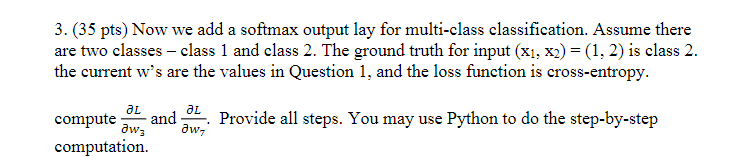

The math in this question is too complexx for me to write out manually, but I can compute this in tensorflow

`tf.constant` allows you to build the neural network manually using tensor-like data structures.
https://www.tensorflow.org/api_docs/python/tf/constant

In [5]:
import tensorflow as tf
# Input layer
x = tf.constant([x1, x2], dtype=tf.float32)

# Second layer weights
w_1 = tf.constant([w1, w2], dtype=tf.float32)
w_2 = tf.constant([w3, w4], dtype=tf.float32)

# Third layer weights
w_3 = tf.constant([w5, w6], dtype=tf.float32)
w_4 = tf.constant([w7, w8], dtype=tf.float32)

# Biased
b_1 = tf.constant([b1], dtype=tf.float32)
b_2 = tf.constant([b2], dtype=tf.float32)



`tf.reduce_sum` allows for easy calculation of the first layer. `tf.nn.relu()` let's us treat it like a neural network node wrapped in the ReLU activation <br><br>
$h_1=ReLU(\begin{bmatrix}x_1\cr x_2\end{bmatrix} * \begin{bmatrix}w_1\cr x_2\end{bmatrix} + b) = ReLU(x_1w_1 + x_2w_2 + b)$ <br><br>

- https://www.tensorflow.org/api_docs/python/tf/nn/relu
- https://www.tensorflow.org/api_docs/python/tf/math/reduce_sum



In [6]:

# Hidden layer
hidden_1 = tf.nn.relu(tf.reduce_sum(x * w_1) + b_1)
hidden_2 = tf.nn.relu(tf.reduce_sum(x * w_2) + b_1)

# Make the hidden layer outputs a tensor
# We made a 2 x 1 tensor similiar to the input matrix and am repeating the steps above with the 
# weights before the output layer
# https://www.tensorflow.org/api_docs/python/tf/stack
hidden = tf.stack([hidden_1, hidden_2])

# Output layer
o1 = tf.reduce_sum(hidden * w_3) + b_2
o2 = tf.reduce_sum(hidden * w_4) + b_2

Apply the Softmax on the output using `tf.nn.softmax([array-like])`
- https://www.tensorflow.org/api_docs/python/tf/nn/softmax

In [7]:
output = tf.nn.softmax(tf.stack([o1, o2]))

# Print the softmax output probabilities
print("Softmax output probabilities: ", output)

Softmax output probabilities:  tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


Run all the computations again, only this time use the `tf.GradientTape()` context manager to track the operations. 
It's method .gradient() allows us to easily compute the loss function with respect to certain weights
- https://www.tensorflow.org/api_docs/python/tf/GradientTape

In [9]:
# Ground truth (y = class 2)
y_true = tf.constant([1], dtype=tf.int32)  # Class 2 = softmax([0, 1])


with tf.GradientTape() as tape:
    tape.watch([w_1, w_2, w_3, w_4, b_1, b_2])  # Tell the tape to watch the weights and biases

    # Compute hidden layer neurons
    hidden_1 = tf.nn.relu(tf.reduce_sum(x * w_1) + b_1)
    hidden_2 = tf.nn.relu(tf.reduce_sum(x * w_2) + b_1)

    # Stack hidden layer outputs into a single tensor
    hidden = tf.stack([hidden_1, hidden_2])

    # Compute output neurons (logits)
    o1 = tf.reduce_sum(hidden * w_3) + b_2
    o2 = tf.reduce_sum(hidden * w_4) + b_2

    # Apply softmax to the outputs (logits)
    output = tf.nn.softmax(tf.reshape(tf.stack([o1, o2]), (1, 2)))

    # Define the loss (cross-entropy loss)
    loss = tf.losses.sparse_categorical_crossentropy(y_true, output)

# Compute gradients of the loss w.r.t. w3 and w4
grad_w3, grad_w4 = tape.gradient(loss, [w_3, w_4])

# Print the gradients
print("Gradient of loss w.r.t. w_3: ", grad_w3)
print("Gradient of loss w.r.t. w_4: ", grad_w4)

Gradient of loss w.r.t. w_3:  tf.Tensor([0.4847079 0.4847079], shape=(2,), dtype=float32)
Gradient of loss w.r.t. w_4:  tf.Tensor([-0.48470783 -0.48470783], shape=(2,), dtype=float32)
